In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from more_itertools import flatten
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from dhdrnet.util import ROOT_DIR
data_dir = ROOT_DIR / "precomputed_data"

In [64]:
df = pd.read_csv(data_dir / "store_perceptual.csv")
df = df.set_index(["name"])
df

,metric,ev1,ev2,score
name,,,,
0006_20160728_123257_859,mse,-6.0,-5.5,21719.742980
0006_20160728_123257_859,ssim,-6.0,-5.5,0.010384
0006_20160728_123257_859,perceptual,-6.0,-5.5,0.923738
0006_20160728_123257_859,mse,-6.0,-5.0,21449.366655
0006_20160728_123257_859,ssim,-6.0,-5.0,0.016527
...,...,...,...,...
0043_20160923_122514_781,ssim,4.5,5.5,0.518569
0043_20160923_122514_781,perceptual,4.5,5.5,0.480811
0043_20160923_122514_781,mse,5.0,5.5,9053.965736


### prepare data, set index to the names, group by metric, clean

In [65]:
bad = df.loc["metric"]
df = df.loc[df.index.difference(bad.index)]

In [67]:
df[["ev1", "ev2"]] = df[["ev1", "ev2"]].astype("float")
df["ev"] = df[["ev1", "ev2"]].apply(lambda df: tuple(sorted(df)), axis=1)
df = df.drop(["ev1", "ev2"],axis=1)
dfg = df.groupby("metric")

In [68]:
mse_df = dfg.get_group("mse").drop("metric",axis=1)
mse_df

,score,ev
name,,
0006_20160721_163256_525,21478.280158,"(-6.0, -5.5)"
0006_20160721_163256_525,21143.568190,"(-6.0, -5.0)"
0006_20160721_163256_525,20603.549521,"(-6.0, -4.5)"
0006_20160721_163256_525,19801.189927,"(-6.0, -4.0)"
0006_20160721_163256_525,18690.164039,"(-6.0, -3.5)"
...,...,...
synthetic_ramp_night_motion_blur,6156.736391,"(4.0, 5.0)"
synthetic_ramp_night_motion_blur,6366.813431,"(4.0, 5.5)"
synthetic_ramp_night_motion_blur,6499.458799,"(4.5, 5.0)"


In [86]:
mse_mins = mse_df.pivot(columns="ev").idxmin(axis=1).apply(lambda f: f[1])

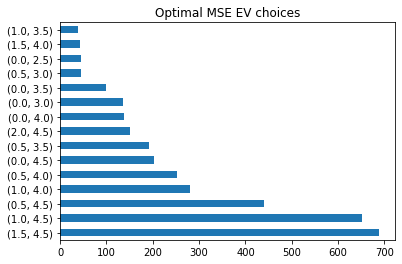

In [110]:
mse_mins.value_counts().iloc[:15].plot.barh(title="Optimal MSE EV choices")

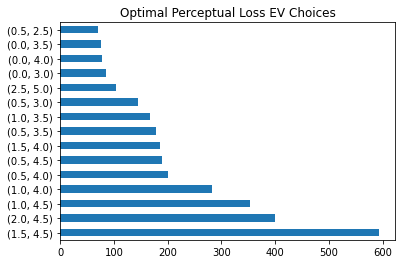

In [111]:
perc_df = dfg.get_group("perceptual").drop(columns="metric")
perc_mins = perc_df.pivot(columns="ev").idxmin(axis=1).apply(lambda f: f[1])
perc_mins.value_counts().iloc[:15].plot.barh(title="Optimal Perceptual Loss EV Choices")

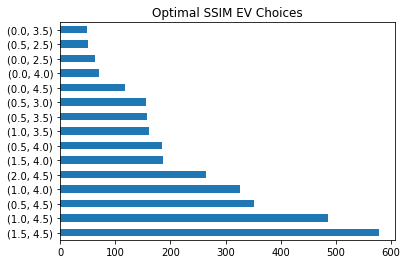

In [112]:
ssim_df = dfg.get_group("ssim").drop(columns="metric")
ssim_mins = ssim_df.pivot(columns="ev").idxmax(axis=1).apply(lambda f: f[1])
ssim_mins.value_counts().iloc[:15].plot.barh(title="Optimal SSIM EV Choices")